In [8]:
import praw
from praw.models import Redditor
import pandas as pd
import datetime
import numpy as np
import pickle
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
import gensim
import re
import seaborn as sns; sns.set(rc={'figure.figsize':(12,10)})
from textblob import TextBlob

In [46]:
db1 = pd.read_pickle('/Users/gabgilling/Dropbox/QMSS/Fall 2019/NLP/metaFinal.pkl')

In [48]:
pd.read_pickle('/Users/gabgilling/Dropbox/QMSS/Fall 2019/NLP/commentsFinal.pkl')

,body,id,parent_id,preprocessed,raw,replies,score,subreddit,bigramed,processed,date_x,date_y,labels
0,And Podesta ended her campaign with a lie to t...,d9shs6d,5bzjv5,podesta ended campaign lie crowd fitting even ...,And Podesta ended her campaign with a lie to t...,"[(1401, she couldn't even give a final graciou...",3464,The_Donald,"[And, Podesta, ended, her, campaign, with, a, ...",podesta ended campaign lie crowd fitting even ...,2016-11-09 15:42:06,2016-11-09 15:42:06,1
1,"Tonight we CELEBRATE, tomorrow's we FUCKING MAGA",d9shrml,5bzjv5,tonight celebrate fucking maga love lock_her,"Tonight we CELEBRATE, tomorrow's we FUCKING MA...","[(344, I love you ), (473, ###LOCK HER UP!!!)]",2630,The_Donald,"[Tonight, we, CELEBRATE, we, FUCKING, MAGA, I,...",tonight celebrate fucking maga love lock_her,2016-11-09 15:42:06,2016-11-09 15:42:06,1
2,BUSH OUTDATED 👴OBAMA OVERRATED 😫HILARY ELIMINA...,d9shrsr,5bzjv5,bush outdated obama overrated hilary eliminate...,BUSH OUTDATED 👴OBAMA OVERRATED 😫HILARY ELIMINA...,"[(300, I love you )]",3145,The_Donald,"[BUSH, OUTDATED, OBAMA, OVERRATED, HILARY, ELI...",bush outdated obama overrated hilary eliminate...,2016-11-09 15:42:06,2016-11-09 15:42:06,1
3,gg ez,d9shrvj,5bzjv5,gg ez sick references bro references sick top_...,gg ez Sick references bro. Your references are...,"[(170, Sick references bro. Your references ar...",1716,The_Donald,"[gg, ez, Sick, references, bro, Your, referenc...",gg ez sick references bro references sick top_...,2016-11-09 15:42:06,2016-11-09 15:42:06,1
4,/r/hillaryclinton is basically shut down. fuck...,d9si7hr,5bzjv5,r_hillaryclinton basically shut_down fucking h...,/r/hillaryclinton is basically shut down. fuck...,"[(344, And why wouldn't they? It's over. No mo...",752,The_Donald,"[r_hillaryclinton, is, basically, shut_down, f...",r_hillaryclinton basically shut_down fucking h...,2016-11-09 15:42:06,2016-11-09 15:42:06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
364453,Awesome.\n\nMost redpillers miss this point wh...,f5jql3c,dnqmen,awesome redpillers miss point simplest put get...,Awesome.\n\nMost redpillers miss this point wh...,"[(5, exactly game and confidence are good and ...",7,TheRedPill,"[Awesome, Most, redpillers, miss, this, point,...",awesome redpillers miss point simplest put gir...,2019-10-27 16:23:01,2019-10-27 16:23:01,5
364454,Wonderful points with a hint of sidebar materi...,f5i36h9,dnqmen,wonderful points hint sidebar_material like ea...,Wonderful points with a hint of sidebar materi...,[],4,TheRedPill,"[Wonderful, points, with, a, hint, of, sidebar...",wonderful points hint sidebar_material easy da...,2019-10-27 16:23:01,2019-10-27 16:23:01,5
364455,I shall not beat on a dead horse again.,f64ka5a,dnqmen,shall beat dead_horse,I shall not beat on a dead horse again.,[],1,TheRedPill,"[I, shall, not, beat, on, a, dead_horse, again]",shall beat dead_horse,2019-10-27 16:23:01,2019-10-27 16:23:01,5
364456,"Exactly. Good, practical stuff.\n\nI would add...",f5h0rnd,dnqmen,exactly good practical stuff would add one top...,"Exactly. Good, practical stuff.\n\nI would add...",[],1,TheRedPill,"[Exactly, Good, practical, stuff, I, would, ad...",exactly good practical stuff add one top head ...,2019-10-27 16:23:01,2019-10-27 16:23:01,5


In [72]:
x = pd.read_pickle('/Users/gabgilling/Dropbox/QMSS/Fall 2019/NLP/final.pkl')

In [50]:
db1

,author,parent_id,title,date,score,post_type,body,subreddit
0,lamhrp2,7h23he,The trump problem,2017-12-02 14:05:41,473,media,https://i.redd.it/kqnvc5wcrh101.jpg,statistics
1,SheComplicated,7dopht,Bing results. Where stats and fashion meet.,2017-11-18 02:00:54,302,media,https://i.redd.it/xzd3c5ka9myz.jpg,statistics
2,None,5smcqw,RIP Hans Rosling - a tribute to the legend,2017-02-07 19:29:48,292,media,https://www.youtube.com/watch?v=hVimVzgtD6w,statistics
3,proteanpeer,b3t9fk,Statisticians unite to call on scientists to a...,2019-03-21 21:21:56,282,text,Editorial: https://www.tandfonline.com/doi/ful...,statistics
4,americ,7aqv39,The scariest Halloween monster of them all!,2017-11-04 18:16:26,280,media,https://i.imgur.com/oZYJSIU_d.jpg?maxwidth=640...,statistics
...,...,...,...,...,...,...,...,...
988,RemyPrice,391bf0,Chad Thundercock succeeds at online dating.,2015-06-08 23:06:14,609,text,**Chad was not impressed with online dating.**...,TheRedPill
989,Archwinger,2ytcbo,"Women don't just give ""alpha"" guys their best ...",2015-03-13 01:27:13,610,text,"One of the cores of “Red Pill theory,” if you ...",TheRedPill
990,redpillschool,4467cn,The world is scared of men congregating. Red P...,2016-02-05 01:12:00,605,text,Just days until the infamous Roosh V meetup da...,TheRedPill
991,None,5rnyd3,"In the wake of the U.C. Berkeley riots, let us...",2017-02-03 01:02:02,603,text,"If you're not in the know, U.C. Berkeley had t...",TheRedPill


In [2]:
db1 = pd.read_pickle('/Users/gabgilling/Dropbox/QMSS/Fall 2019/NLP/donaldmeta.pkl')
db2 = pd.read_pickle('/Users/gabgilling/Dropbox/QMSS/Fall 2019/NLP/sandersmeta.pkl')
db3 = pd.read_pickle('/Users/gabgilling/Dropbox/QMSS/Fall 2019/NLP/warrenmeta.pkl')
db4 = pd.read_pickle('/Users/gabgilling/Dropbox/QMSS/Fall 2019/NLP/conservativemeta.pkl')
db5 = pd.read_pickle('/Users/gabgilling/Dropbox/QMSS/Fall 2019/NLP/socialismmeta.pkl')
db6 = pd.read_pickle('/Users/gabgilling/Dropbox/QMSS/Fall 2019/NLP/redpillmeta.pkl')

In [3]:
df1 = pd.read_pickle('/Users/gabgilling/Dropbox/QMSS/Fall 2019/NLP/The_Donald_texts.pkl')
df2 = pd.read_pickle('/Users/gabgilling/Dropbox/QMSS/Fall 2019/NLP/SandersForPresident_texts.pkl')
df3 = pd.read_pickle('/Users/gabgilling/Dropbox/QMSS/Fall 2019/NLP/ElizabethWarren_texts.pkl')
df4 = pd.read_pickle('/Users/gabgilling/Dropbox/QMSS/Fall 2019/NLP/Conservative_texts.pkl')
df5 = pd.read_pickle('/Users/gabgilling/Dropbox/QMSS/Fall 2019/NLP/socialism_texts.pkl')
df6 = pd.read_pickle('/Users/gabgilling/Dropbox/QMSS/Fall 2019/NLP/TheRedPill_texts.pkl')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/gabgilling/Dropbox/QMSS/Fall 2019/NLP/The_Donald_texts.pkl'

In [619]:
db1

,author,parent_id,title,date,score,post_type,body,subreddit
0,None,5bzjv5,DONALD J. TRUMP DECLARED THE WINNER!,2016-11-09 15:42:06,66721,text,#Meme Magic is REAL.\n\n#Donald J. Trump is th...,the_donald
1,the-realDonaldTrump,4uxdbn,I’m Donald J. Trump and I'm Your Next Presiden...,2016-07-28 06:28:22,42123,text,Hello The_Donald readers and the entire Reddit...,the_donald
2,SeriousBlak,5gvy1j,The New Algorithm Was Designed To Keep Preside...,2016-12-07 06:22:16,40971,media,https://i.sli.mg/gu0oHA.png,the_donald
3,hillaryisgoingdown,5jt9xs,CNN will soon be #1...when searching for the t...,2016-12-23 05:45:56,37277,media,https://i.redd.it/7jeyhzgku65y.png,the_donald
4,HIGH_ENERGY_MEMES,5bz5ds,ALL CELEBRITIES THAT VOWED TO LEAVE THE U.S.A....,2016-11-09 14:37:40,36618,text,Now that we have proven our commitment to the ...,the_donald
...,...,...,...,...,...,...,...,...
989,InternetOligarch,bc5tlq,The mighty morphing Democrat rangers,2019-04-12 06:03:29,12647,media,https://i.imgur.com/cVQlx3I.jpg,the_donald
990,threebabies,dkxx3v,See that little gray arrow? Turn that bad boy ...,2019-10-21 17:24:19,12544,media,https://i.redd.it/h2pzx4bf4vt31.jpg,the_donald
991,None,df9xvc,Reddit is currently censoring this image,2019-10-09 09:30:36,12094,media,https://i.redd.it/khupx81z4fr31.jpg,the_donald
992,TrumpThirdTerm,duam3e,Reddit is censoring this image of Hong Kong pr...,2019-11-10 20:01:35,11771,media,https://i.redd.it/s56wj9vimux31.jpg,the_donald


In [463]:
for df in [ElizabethWarren, Conservative, socialism, TheRedPill]:
    df['raw'] = df['body'] + ' ' + df['replies'].apply(lambda x: ' '.join([y[1] for y in x]))

/Users/gabgilling/anaconda3/envs/QMSS/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [511]:
db1 = db1[~db1['id'].isnull()]
db2 = db2[~db2['id'].isnull()]
db3 = db3[~db3['id'].isnull()]
db4 = db4[~db4['id'].isnull()]
db5 = db5[~db5['id'].isnull()]
db6 = db6[~db6['id'].isnull()]

In [513]:
db1 = db1.rename(columns = {'id': 'parent_id'})
db2 = db2.rename(columns = {'id': 'parent_id'})
db3 = db3.rename(columns = {'id': 'parent_id'})
db4 = db4.rename(columns = {'id': 'parent_id'})
db5 = db5.rename(columns = {'id': 'parent_id'})
db6 = db6.rename(columns = {'id': 'parent_id'})

In [525]:
def preprocess(raw_series):
    
    preprocessed_series = raw_series.apply(lambda x: re.sub('[^\'A-z0-9]+', ' ', x))
    # df['preprocessed'] = df['preprocessed'].apply(lambda x: ' '.join([word for word in x.split() if word.isalpha()]))
    preprocessed_series = preprocessed_series.apply(lambda x: [word for word in x.split() if word.isalpha()])
    
    return preprocessed_series

In [526]:
df = pd.concat([df1,df2,df3,df4,df5,df6])

In [531]:
df = preprocess(df)

In [ ]:
df['labels'] = 0
for i in range(len(df)):
    print(i)
    if df['subreddit'].iloc[i] == 'The_Donald':
        df['labels'].iloc[i] = 1
    elif df['subreddit'].iloc[i] == 'ElizabethWarren':
        df['labels'].iloc[i] = 2
    elif df['subreddit'].iloc[i] == 'Conservative':
        df['labels'].iloc[i] = 3
    elif df['subreddit'].iloc[i] == 'socialism':
        df['labels'].iloc[i] = 4
    elif df['subreddit'].iloc[i] == 'TheRedPill':
        df['labels'].iloc[i] = 5

In [680]:
df.head()

,body,id,parent_id,preprocessed,raw,replies,score,subreddit,bigramed,processed,date_x,date_y,labels
0,And Podesta ended her campaign with a lie to t...,d9shs6d,5bzjv5,podesta ended campaign lie crowd fitting even ...,And Podesta ended her campaign with a lie to t...,"[(1401, she couldn't even give a final graciou...",3464,The_Donald,"[And, Podesta, ended, her, campaign, with, a, ...",podesta ended campaign lie crowd fitting even ...,2016-11-09 15:42:06,2016-11-09 15:42:06,1
1,"Tonight we CELEBRATE, tomorrow's we FUCKING MAGA",d9shrml,5bzjv5,tonight celebrate fucking maga love lock_her,"Tonight we CELEBRATE, tomorrow's we FUCKING MA...","[(344, I love you ), (473, ###LOCK HER UP!!!)]",2630,The_Donald,"[Tonight, we, CELEBRATE, we, FUCKING, MAGA, I,...",tonight celebrate fucking maga love lock_her,2016-11-09 15:42:06,2016-11-09 15:42:06,1
2,BUSH OUTDATED 👴OBAMA OVERRATED 😫HILARY ELIMINA...,d9shrsr,5bzjv5,bush outdated obama overrated hilary eliminate...,BUSH OUTDATED 👴OBAMA OVERRATED 😫HILARY ELIMINA...,"[(300, I love you )]",3145,The_Donald,"[BUSH, OUTDATED, OBAMA, OVERRATED, HILARY, ELI...",bush outdated obama overrated hilary eliminate...,2016-11-09 15:42:06,2016-11-09 15:42:06,1
3,gg ez,d9shrvj,5bzjv5,gg ez sick references bro references sick top_...,gg ez Sick references bro. Your references are...,"[(170, Sick references bro. Your references ar...",1716,The_Donald,"[gg, ez, Sick, references, bro, Your, referenc...",gg ez sick references bro references sick top_...,2016-11-09 15:42:06,2016-11-09 15:42:06,1
4,/r/hillaryclinton is basically shut down. fuck...,d9si7hr,5bzjv5,r_hillaryclinton basically shut_down fucking h...,/r/hillaryclinton is basically shut down. fuck...,"[(344, And why wouldn't they? It's over. No mo...",752,The_Donald,"[r_hillaryclinton, is, basically, shut_down, f...",r_hillaryclinton basically shut_down fucking h...,2016-11-09 15:42:06,2016-11-09 15:42:06,1


In [539]:
df = df.drop(columns = {'date'})

In [40]:
f = df.groupby(by = ['parent_id', 'date'])['processed'].sum().apply(lambda x: [word for word in x.split() if len(word) < 20])

In [55]:
dff = pd.read_pickle('/Users/gabgilling/Dropbox/QMSS/Fall 2019/NLP/final.pkl')

In [57]:
f

,parent_id,processed
date,,
2012-10-05 18:23:46,10zrn3,"[ocw, jhsph, edu, index, cfm, go, viewcourse, ..."
2012-10-08 18:15:19,114z59,"[sexy, thing, talking_about, real, time, analy..."
2012-10-10 17:40:55,1191h4,"[us, studied, informatics, emergence, phrase, ..."
2012-10-16 12:09:13,11k80t,"[did_anybody, actually, thinking, taking, onli..."
2012-10-22 02:05:52,11v31a,"[understand, simple, spent, ages, trying, conv..."
...,...,...
2012-07-18 20:00:41,wrj2k,"[thanks, grad_student, really, benefit]"
2012-07-30 17:41:05,xe250,"[alongside, illustration, statistical, program..."
2012-07-31 03:29:22,xf2w3,"[appreciate, feedback, ideas, anyone, wrote, t..."


In [59]:
t = db1.merge(f, on = 'parent_id')

In [62]:
t

,author,parent_id,title,date,score,post_type,body,subreddit,processed
0,lamhrp2,7h23he,The trump problem,2017-12-02 14:05:41,473,media,https://i.redd.it/kqnvc5wcrh101.jpg,statistics,"[abracadabra, martingale, probability, profess..."
1,SheComplicated,7dopht,Bing results. Where stats and fashion meet.,2017-11-18 02:00:54,302,media,https://i.redd.it/xzd3c5ka9myz.jpg,statistics,"[slightly, related, story, working, shiny, wan..."
2,None,5smcqw,RIP Hans Rosling - a tribute to the legend,2017-02-07 19:29:48,292,media,https://www.youtube.com/watch?v=hVimVzgtD6w,statistics,"[thanks, posting, found, really, saddened, use..."
3,proteanpeer,b3t9fk,Statisticians unite to call on scientists to a...,2019-03-21 21:21:56,282,text,Editorial: https://www.tandfonline.com/doi/ful...,statistics,"[multiple, similar, attempts, made, back, isnt..."
4,americ,7aqv39,The scariest Halloween monster of them all!,2017-11-04 18:16:26,280,media,https://i.imgur.com/oZYJSIU_d.jpg?maxwidth=640...,statistics,"[things, scary, implied, reliance, p_values, d..."
...,...,...,...,...,...,...,...,...,...
1922,solidshakego,cghvgx,A sign.,2019-07-22 23:37:21,69386,media,https://i.redd.it/2za8jxkuqwb31.jpg,gaming,"[got, killed, reach, hacker, minecrafy, tom, c..."
1923,Org_ChemistVir,9y2ajw,Is this an offensive foul?,2018-11-18 05:10:15,69362,media,https://i.redd.it/wb643oaszzy11.jpg,gaming,"[nothin, raspberry, smh, live, society, man, g..."
1924,canadilf,8f78ru,Fortnite players are getting out of control,2018-04-27 03:40:08,69348,media,https://i.imgur.com/UpTz3sc.gifv,gaming,"[dog, confused, know, big_deal, since, gets, d..."
1925,andromedusprops,b9ujsw,Scottish Pokémon trainer,2019-04-05 22:07:01,69294,media,https://i.redd.it/sghmx5p7khq21.jpg,gaming,"[get_oot, eh, fucking, baw_ya, wee_shite, writ..."


In [71]:
db

,author,parent_id,title,date,score,post_type,body,subreddit,processed
0,lamhrp2,7h23he,The trump problem,2017-12-02 14:05:41,473,media,https://i.redd.it/kqnvc5wcrh101.jpg,statistics,"[abracadabra, martingale, probability, profess..."
1,SheComplicated,7dopht,Bing results. Where stats and fashion meet.,2017-11-18 02:00:54,302,media,https://i.redd.it/xzd3c5ka9myz.jpg,statistics,"[slightly, related, story, working, shiny, wan..."
2,None,5smcqw,RIP Hans Rosling - a tribute to the legend,2017-02-07 19:29:48,292,media,https://www.youtube.com/watch?v=hVimVzgtD6w,statistics,"[thanks, posting, found, really, saddened, use..."
3,proteanpeer,b3t9fk,Statisticians unite to call on scientists to a...,2019-03-21 21:21:56,282,text,Editorial: https://www.tandfonline.com/doi/ful...,statistics,"[multiple, similar, attempts, made, back, isnt..."
4,americ,7aqv39,The scariest Halloween monster of them all!,2017-11-04 18:16:26,280,media,https://i.imgur.com/oZYJSIU_d.jpg?maxwidth=640...,statistics,"[things, scary, implied, reliance, p_values, d..."
...,...,...,...,...,...,...,...,...,...
1922,solidshakego,cghvgx,A sign.,2019-07-22 23:37:21,69386,media,https://i.redd.it/2za8jxkuqwb31.jpg,gaming,"[got, killed, reach, hacker, minecrafy, tom, c..."
1923,Org_ChemistVir,9y2ajw,Is this an offensive foul?,2018-11-18 05:10:15,69362,media,https://i.redd.it/wb643oaszzy11.jpg,gaming,"[nothin, raspberry, smh, live, society, man, g..."
1924,canadilf,8f78ru,Fortnite players are getting out of control,2018-04-27 03:40:08,69348,media,https://i.imgur.com/UpTz3sc.gifv,gaming,"[dog, confused, know, big_deal, since, gets, d..."
1925,andromedusprops,b9ujsw,Scottish Pokémon trainer,2019-04-05 22:07:01,69294,media,https://i.redd.it/sghmx5p7khq21.jpg,gaming,"[get_oot, eh, fucking, baw_ya, wee_shite, writ..."


In [73]:
pd.concat([x, t])

/Users/gabgilling/anaconda3/envs/QMSS/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,author,body,date,parent_id,post_type,processed,score,subreddit,texts,title
693,json_,**EDIT: I did not write this.** A link to the ...,2013-11-30 03:29:49,1rq5gr,text,NaN,700,theredpill,"[https_pastebin, slander, female, socialist, f...",6 Harsh Truths That Will Make You a Better Person
831,SoftHarem,"Well folks, as 2013 wraps up this has been a h...",2014-01-02 06:05:55,1u6m3m,text,NaN,644,theredpill,"[treating, man, supposedly, loves, worse, trea...","The basics explained, and our direction for 2014."
276,BobSagetTheFaget,http://en.wikipedia.org/wiki/Cesar_Millan#Pers...,2014-01-08 07:47:37,1unyv5,media,NaN,954,theredpill,"[dressed, larry_david, rolling, around, box, l...",TIL: Cesar Millan's wife (The Dog Whisperer) f...
83,Blake55,This is not my story - but I found it relevant...,2014-01-20 01:28:12,1vlpri,text,NaN,1348,theredpill,"[assumes, sucks, doesn_t, enough, eventually, ...",Beta for 10 years --> awakens --> breaks habit...
434,theVet,The Nordic Council of Ministers (a regional in...,2014-01-22 20:42:08,1vuho8,text,NaN,822,theredpill,"[topic, old, speeches, absolutely, fantastic, ...",The documentary that made Scandinavians cut al...
...,...,...,...,...,...,...,...,...,...,...
1922,solidshakego,https://i.redd.it/2za8jxkuqwb31.jpg,2019-07-22 23:37:21,cghvgx,media,"[got, killed, reach, hacker, minecrafy, tom, c...",69386,gaming,NaN,A sign.
1923,Org_ChemistVir,https://i.redd.it/wb643oaszzy11.jpg,2018-11-18 05:10:15,9y2ajw,media,"[nothin, raspberry, smh, live, society, man, g...",69362,gaming,NaN,Is this an offensive foul?
1924,canadilf,https://i.imgur.com/UpTz3sc.gifv,2018-04-27 03:40:08,8f78ru,media,"[dog, confused, know, big_deal, since, gets, d...",69348,gaming,NaN,Fortnite players are getting out of control
1925,andromedusprops,https://i.redd.it/sghmx5p7khq21.jpg,2019-04-05 22:07:01,b9ujsw,media,"[get_oot, eh, fucking, baw_ya, wee_shite, writ...",69294,gaming,NaN,Scottish Pokémon trainer


In [42]:
f = f.reset_index('parent_id')

In [44]:
db = db.merge(f, on = 'parent_id')

In [706]:
df = df.merge(db[['parent_id', 'date']], on = 'parent_id')
db = db.sort_values('date')
f = df.groupby(by = ['parent_id', 'date'])['processed'].sum().apply(lambda x: [word for word in x.split() if len(word) < 20])
f = f.reset_index()

db['texts'] = f['processed']

In [707]:
db

,author,parent_id,title,date,score,post_type,body,subreddit,texts,mainTopic,polarity_tb,subjectivity_tb
693,json_,1rq5gr,6 Harsh Truths That Will Make You a Better Person,2013-11-30 03:29:49,700,text,**EDIT: I did not write this.** A link to the ...,theredpill,"[https_pastebin, slander, female, socialist, f...",0,0.092534,0.535129
831,SoftHarem,1u6m3m,"The basics explained, and our direction for 2014.",2014-01-02 06:05:55,644,text,"Well folks, as 2013 wraps up this has been a h...",theredpill,"[treating, man, supposedly, loves, worse, trea...",0,0.071271,0.536543
276,BobSagetTheFaget,1unyv5,TIL: Cesar Millan's wife (The Dog Whisperer) f...,2014-01-08 07:47:37,954,media,http://en.wikipedia.org/wiki/Cesar_Millan#Pers...,theredpill,"[dressed, larry_david, rolling, around, box, l...",0,0.135571,0.469005
83,Blake55,1vlpri,Beta for 10 years --> awakens --> breaks habit...,2014-01-20 01:28:12,1348,text,This is not my story - but I found it relevant...,theredpill,"[assumes, sucks, doesn_t, enough, eventually, ...",0,0.119494,0.540884
434,theVet,1vuho8,The documentary that made Scandinavians cut al...,2014-01-22 20:42:08,822,text,The Nordic Council of Ministers (a regional in...,theredpill,"[topic, old, speeches, absolutely, fantastic, ...",6,0.152196,0.496002
...,...,...,...,...,...,...,...,...,...,...,...,...
860,Looking_Light33,dx1nen,Elizabeth Warren makes gains with black voters,2019-11-16 11:35:48,93,media,https://amp-axios-com.cdn.ampproject.org/v/s/a...,elizabethwarren,"[much, mocking, trump, debating, bernie, wish,...",3,0.043619,0.500278
325,rieslingatkos,dx2qwg,Elizabeth Warren’s ‘mug of billionaire tears’ ...,2019-11-16 13:25:24,329,media,https://www.marketwatch.com/story/elizabeth-wa...,elizabethwarren,"[snowden, following, one, person, nsa, yeah, b...",3,0.155143,0.519032
76,ltron9k,dx5tic,I loved this New Yorker cartoon from earlier i...,2019-11-16 19:34:09,683,media,https://i.redd.it/18h3ibkab1z31.jpg,elizabethwarren,"[feel, alpha, counting, words, texts, make, su...",0,0.083333,0.550310
94,Tmfwang,dx6dy2,Is that really so radical?,2019-11-16 20:35:56,23569,media,https://i.redd.it/5vdtsfabm1z31.jpg,sandersforpresident,"[wow, bullet_dodged, great, write, still, pede...",0,0.041745,0.521141


In [678]:
df['subreddit'].unique()

array([Subreddit(display_name='The_Donald'),
       Subreddit(display_name='SandersForPresident'),
       Subreddit(display_name='ElizabethWarren'),
       Subreddit(display_name='Conservative'),
       Subreddit(display_name='socialism'),
       Subreddit(display_name='TheRedPill')], dtype=object)

In [553]:
db = pd.concat([db1,db2,db3,db4,db5,db6])

In [567]:
#db.to_pickle('/Users/gabgilling/Dropbox/QMSS/Fall 2019/NLP/final.pkl')

In [9]:
df = pd.read_pickle('/Users/gabgilling/Dropbox/QMSS/Fall 2019/NLP/statsgamingtexts.pkl')

In [10]:
df

,subreddit,parent_id,id,score,body,replies,date,raw,preprocessed
0,statistics,7h23he,dqnj0sx,40,The Abracadabra Martingale! My probability pro...,"[(11, So how do you solve it?)]",2017-12-02 14:05:41,The Abracadabra Martingale! My probability pro...,"[The, Abracadabra, Martingale, My, probability..."
1,statistics,7h23he,dqniij0,18,And the answer is....?,"[(38, 8,031,810,176)]",2017-12-02 14:05:41,"And the answer is....? 8,031,810,176","[And, the, answer, is]"
2,statistics,7h23he,dqnmg37,17,Don't you need to know how fast he's typing?,"[(12, It's phrased weirdly but I guess it's ""a...",2017-12-02 14:05:41,Don't you need to know how fast he's typing? I...,"[you, need, to, know, how, fast, typing, phras..."
3,statistics,7h23he,dqnzy28,8,Time magazine called me to say that I was PROB...,[],2017-12-02 14:05:41,Time magazine called me to say that I was PROB...,"[Time, magazine, called, me, to, say, that, I,..."
4,statistics,7h23he,dqnknf6,8,"Correct me if I’m wrong, but isn’t this solved...","[(13, If the question was ""what's the probabil...",2017-12-02 14:05:41,"Correct me if I’m wrong, but isn’t this solved...","[Correct, me, if, I, m, wrong, but, isn, t, th..."
...,...,...,...,...,...,...,...,...,...
124209,gaming,c2xcdb,ernq342,1,is grammerly built in?,[],2019-06-20 19:22:56,is grammerly built in?,"[is, grammerly, built, in]"
124210,gaming,c2xcdb,ernq4hb,1,"Seems like a cool game, downloading now!",[],2019-06-20 19:22:56,"Seems like a cool game, downloading now!","[Seems, like, a, cool, game, downloading, now]"
124211,gaming,c2xcdb,ernq4s0,1,Angry Physics?,[],2019-06-20 19:22:56,Angry Physics?,"[Angry, Physics]"
124212,gaming,c2xcdb,ernq7dd,1,Why does it sound like the music is from a gam...,[],2019-06-20 19:22:56,Why does it sound like the music is from a gam...,"[Why, does, it, sound, like, the, music, is, f..."


##### Adding Bigrams

In [11]:
def genBigrams(series,trigram = False, min_count=5, threshold=50):
    
    bigram = gensim.models.Phrases(series, min_count=min_count, threshold=threshold)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    
    if trigram == True:
        trigram = gensim.models.Phrases(bigram[series], threshold=threshold)  
        trigram_mod = gensim.models.phrases.Phraser(trigram)
        
        return trigram_mod[bigram_mod[series]]
    
    else:
        
        return bigram_mod[series]

# df['preprocessed'] = genBigrams(df['preprocessed'], min_count=5, threshold=50)
df['bigramed'] = genBigrams(df['preprocessed'], trigram = False, min_count=5, threshold=50)

In [12]:
def filter_stopwords(aList):
    '''
    takes in a list, and returns same list with stop words filtered out, and words lowercased
    '''
    from nltk.corpus import stopwords
    
    stop = (stopwords.words('english'))
    # add stopwords as uppercase and capitalized version of themselves
    stop += [word.upper() for word in stop]
    stop += [word.capitalize() for word in stop]
    stop.extend('removed')
    stop = set(stop)
    
    
    return ' '.join([word.lower() for word in aList if word not in stop])

In [17]:
df['processed'] = df['bigramed'].apply(lambda x: filter_stopwords(x))

In [18]:
df

,subreddit,parent_id,id,score,body,replies,date,raw,preprocessed,bigramed
0,statistics,7h23he,dqnj0sx,40,The Abracadabra Martingale! My probability pro...,"[(11, So how do you solve it?)]",2017-12-02 14:05:41,The Abracadabra Martingale! My probability pro...,abracadabra martingale probability professor l...,"[The, Abracadabra, Martingale, My, probability..."
1,statistics,7h23he,dqniij0,18,And the answer is....?,"[(38, 8,031,810,176)]",2017-12-02 14:05:41,"And the answer is....? 8,031,810,176",answer,"[And, the, answer, is]"
2,statistics,7h23he,dqnmg37,17,Don't you need to know how fast he's typing?,"[(12, It's phrased weirdly but I guess it's ""a...",2017-12-02 14:05:41,Don't you need to know how fast he's typing? I...,need know fast typing phrased weirdly guess ma...,"[you, need, to, know, how, fast, typing, phras..."
3,statistics,7h23he,dqnzy28,8,Time magazine called me to say that I was PROB...,[],2017-12-02 14:05:41,Time magazine called me to say that I was PROB...,time magazine called say probably going get qu...,"[Time, magazine, called, me, to, say, that, I,..."
4,statistics,7h23he,dqnknf6,8,"Correct me if I’m wrong, but isn’t this solved...","[(13, If the question was ""what's the probabil...",2017-12-02 14:05:41,"Correct me if I’m wrong, but isn’t this solved...",correct wrong isn_t solved one would seven let...,"[Correct, me, if, I, m, wrong, but, isn_t, thi..."
...,...,...,...,...,...,...,...,...,...,...
124209,gaming,c2xcdb,ernq342,1,is grammerly built in?,[],2019-06-20 19:22:56,is grammerly built in?,grammerly built,"[is, grammerly, built, in]"
124210,gaming,c2xcdb,ernq4hb,1,"Seems like a cool game, downloading now!",[],2019-06-20 19:22:56,"Seems like a cool game, downloading now!",seems like cool game downloading,"[Seems, like, a, cool, game, downloading, now]"
124211,gaming,c2xcdb,ernq4s0,1,Angry Physics?,[],2019-06-20 19:22:56,Angry Physics?,angry physics,"[Angry, Physics]"
124212,gaming,c2xcdb,ernq7dd,1,Why does it sound like the music is from a gam...,[],2019-06-20 19:22:56,Why does it sound like the music is from a gam...,sound like music game made rpgmaker jrpg japan...,"[Why, does, it, sound, like, the, music, is, f..."


In [19]:
def getSorted_wordFreqs(series):
    '''
    takes in a pandas series, flattens it (converts all the rows into lists and unnests all the lists into one single list)
    and counts the occurence of words, then sorting the dictionary
    
    returns a sorted dictionary with words with highest frequencies
    '''
    from collections import Counter
    import operator
    
    
    # flatten series
    allWords = [item for sublist in series.apply(lambda x: x.split()).to_list() for item in sublist]
    # basic word counting
    wordCounts = Counter(allWords)
    # returns sorted dictionary
    return sorted(dict(wordCounts).items(), key=operator.itemgetter(1), reverse = True)

In [20]:
getSorted_wordFreqs(df['processed'])

[('like', 22016),
 ('game', 21391),
 ('one', 14514),
 ('get', 11795),
 ('would', 11645),
 ('time', 10087),
 ('people', 9653),
 ('games', 8650),
 ('good', 8191),
 ('really', 7921),
 ('think', 7497),
 ('play', 7144),
 ('know', 7024),
 ('even', 6849),
 ('see', 6697),
 ('still', 6505),
 ('got', 6338),
 ('make', 6108),
 ('much', 6030),
 ('first', 5730),
 ('could', 5635),
 ('also', 5579),
 ('looks', 5313),
 ('never', 5254),
 ('way', 5159),
 ('want', 5123),
 ('well', 5006),
 ('go', 4851),
 ('back', 4816),
 ('actually', 4691),
 ('love', 4683),
 ('right', 4680),
 ('work', 4585),
 ('made', 4480),
 ('something', 4441),
 ('thing', 4381),
 ('going', 4377),
 ('playing', 4306),
 ('shit', 4216),
 ('need', 4188),
 ('great', 4112),
 ('look', 4065),
 ('use', 3856),
 ('always', 3831),
 ('better', 3801),
 ('thought', 3751),
 ('say', 3723),
 ('day', 3708),
 ('pretty', 3597),
 ('new', 3571),
 ('best', 3562),
 ('lot', 3494),
 ('someone', 3483),
 ('years', 3468),
 ('man', 3466),
 ('fucking', 3451),
 ('every', 

In [22]:
def morePreprocess(string):
    '''
    manually filter words that occur much
    '''
    words = ['com', 'http', 'https', 'get', 'would', 'www', 'removed', 'https_www', 'http_imgur', 'like', 'even', 'one', 
             'one', 'get', 'would', 'like']
    
    return ' '.join([word for word in string.split() if word not in words and len(word) > 1 and len(word) < 20 ])

df['processed'] = df['processed'].apply(lambda x: morePreprocess(x))

In [23]:
df['processed']

0         abracadabra martingale probability professor l...
1                                                    answer
2         need know fast typing phrased weirdly guess ma...
3         time magazine called say probably going questi...
4         correct wrong isn_t solved seven letter string...
                                ...                        
124209                                      grammerly built
124210                          seems cool game downloading
124211                                        angry physics
124212    sound music game made rpgmaker jrpg japanese r...
124213    rocket_jump game know needed pretty fun got ha...
Name: processed, Length: 124214, dtype: object

In [681]:
df.to_pickle('/Users/gabgilling/Dropbox/QMSS/Fall 2019/NLP/commentsFinal.pkl')

In [25]:
df

,subreddit,parent_id,id,score,body,replies,date,raw,preprocessed,bigramed,processed
0,statistics,7h23he,dqnj0sx,40,The Abracadabra Martingale! My probability pro...,"[(11, So how do you solve it?)]",2017-12-02 14:05:41,The Abracadabra Martingale! My probability pro...,abracadabra martingale probability professor l...,"[The, Abracadabra, Martingale, My, probability...",abracadabra martingale probability professor l...
1,statistics,7h23he,dqniij0,18,And the answer is....?,"[(38, 8,031,810,176)]",2017-12-02 14:05:41,"And the answer is....? 8,031,810,176",answer,"[And, the, answer, is]",answer
2,statistics,7h23he,dqnmg37,17,Don't you need to know how fast he's typing?,"[(12, It's phrased weirdly but I guess it's ""a...",2017-12-02 14:05:41,Don't you need to know how fast he's typing? I...,need know fast typing phrased weirdly guess ma...,"[you, need, to, know, how, fast, typing, phras...",need know fast typing phrased weirdly guess ma...
3,statistics,7h23he,dqnzy28,8,Time magazine called me to say that I was PROB...,[],2017-12-02 14:05:41,Time magazine called me to say that I was PROB...,time magazine called say probably going get qu...,"[Time, magazine, called, me, to, say, that, I,...",time magazine called say probably going questi...
4,statistics,7h23he,dqnknf6,8,"Correct me if I’m wrong, but isn’t this solved...","[(13, If the question was ""what's the probabil...",2017-12-02 14:05:41,"Correct me if I’m wrong, but isn’t this solved...",correct wrong isn_t solved one would seven let...,"[Correct, me, if, I, m, wrong, but, isn_t, thi...",correct wrong isn_t solved seven letter string...
...,...,...,...,...,...,...,...,...,...,...,...
124209,gaming,c2xcdb,ernq342,1,is grammerly built in?,[],2019-06-20 19:22:56,is grammerly built in?,grammerly built,"[is, grammerly, built, in]",grammerly built
124210,gaming,c2xcdb,ernq4hb,1,"Seems like a cool game, downloading now!",[],2019-06-20 19:22:56,"Seems like a cool game, downloading now!",seems like cool game downloading,"[Seems, like, a, cool, game, downloading, now]",seems cool game downloading
124211,gaming,c2xcdb,ernq4s0,1,Angry Physics?,[],2019-06-20 19:22:56,Angry Physics?,angry physics,"[Angry, Physics]",angry physics
124212,gaming,c2xcdb,ernq7dd,1,Why does it sound like the music is from a gam...,[],2019-06-20 19:22:56,Why does it sound like the music is from a gam...,sound like music game made rpgmaker jrpg japan...,"[Why, does, it, sound, like, the, music, is, f...",sound music game made rpgmaker jrpg japanese r...


### 2. Topic Modelling


#### a. Full DataFrame

In [606]:
db['texts']

693    [https_pastebin, slander, female, socialist, f...
831    [treating, man, supposedly, loves, worse, trea...
276    [dressed, larry_david, rolling, around, box, l...
83     [assumes, sucks, doesn_t, enough, eventually, ...
434    [topic, old, speeches, absolutely, fantastic, ...
                             ...                        
860    [much, like, mocking, trump, debating, bernie,...
325    [like, snowden, following, one, person, nsa, y...
76     [feel, alpha, counting, words, texts, make, su...
94     [wow, bullet_dodged, great, write, still, pede...
617    [real, mvps, little, tribute, youtube, watch_v...
Name: texts, Length: 5975, dtype: object

In [52]:
from gensim.models import LdaModel, CoherenceModel
from gensim.corpora import Dictionary
import pyLDAvis.gensim

In [799]:
db.processed.iloc[0]

['saying',
 'nice',
 'guy',
 'restaurant',
 'whose',
 'selling',
 'point',
 'food',
 'make',
 'sick',
 'amazing',
 'never',
 'heard',
 'nice',
 'guys',
 'summed',
 'well',
 'nice',
 'guymisery',
 'comfortable',
 'many',
 'people',
 'prefer',
 'happiness',
 'takes',
 'effort',
 'nice',
 'onecracked',
 'inconsequential',
 'mildly_amusing',
 'bullshit',
 'golden',
 'may',
 'reading',
 'sort',
 'thing',
 'cracked',
 'places',
 'hell',
 'note',
 'must',
 'received',
 'real',
 'bad',
 'emailsmasturbated',
 'furiouslyfucking',
 'fantastic',
 'add',
 'one',
 'thing',
 'learned',
 'rather',
 'harshly',
 'last',
 'years',
 'never',
 'rely',
 'anyone',
 'else',
 'never',
 'life',
 'situation',
 'contingent',
 'someone',
 'else',
 'independent',
 'independence',
 'arguably',
 'greatest',
 'strength',
 'man',
 'living',
 'someone',
 'flake',
 'rent',
 'bail',
 'whatever',
 'situation',
 'may',
 'rely',
 'anyone',
 'wait',
 'someone',
 'start',
 'business',
 'wait',
 'others',
 'rely',
 'learned',
 

In [800]:
texts = db['processed']
id2word = Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]
ldamodel = LdaModel(corpus=corpus, id2word=id2word, num_topics=8)

In [801]:
from operator import itemgetter
db['mainTopic'] = [max(x,key=itemgetter(1))[0] for x in ldamodel[corpus]]

In [802]:
len([x for x in ldamodel[corpus]])

5953

In [803]:
for idx, topic in ldamodel.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.039*"clinton" + 0.038*"hillary" + 0.029*"cnn" + 0.023*"news" + 0.021*"fake" + 0.008*"hillary_clinton" + 0.005*"people" + 0.004*"fake_news" + 0.004*"bernie" + 0.004*"think"
Topic: 1 
Words: 0.012*"people" + 0.006*"one" + 0.005*"think" + 0.004*"even" + 0.004*"time" + 0.004*"want" + 0.004*"make" + 0.004*"right" + 0.004*"us" + 0.003*"know"
Topic: 2 
Words: 0.009*"women" + 0.007*"people" + 0.005*"one" + 0.005*"even" + 0.005*"men" + 0.005*"time" + 0.005*"think" + 0.005*"good" + 0.004*"want" + 0.004*"know"
Topic: 3 
Words: 0.050*"news" + 0.044*"fake" + 0.040*"cnn" + 0.027*"fake_news" + 0.016*"rapist_rapist" + 0.008*"news_fake" + 0.006*"clinton" + 0.005*"people" + 0.005*"trump" + 0.003*"rapist_bill"
Topic: 4 
Words: 0.039*"cnn" + 0.032*"fake" + 0.029*"news" + 0.017*"racism_racism" + 0.008*"fake_news" + 0.006*"hillary_clinton" + 0.005*"hillary" + 0.004*"clinton" + 0.004*"people" + 0.004*"women"
Topic: 5 
Words: 0.010*"hillary" + 0.008*"bernie" + 0.008*"people" + 0.008*"clinto

In [796]:
db.head()

,author,parent_id,title,date_x,score,post_type,body,subreddit,texts,mainTopic,polarity_tb,subjectivity_tb,date_y,processed
0,json_,1rq5gr,6 Harsh Truths That Will Make You a Better Person,2013-11-30 03:29:49,700,text,**EDIT: I did not write this.** A link to the ...,theredpill,"[https_pastebin, slander, female, socialist, f...",0,0.092534,0.535129,2013-11-30 03:29:49,"[saying, nice, guy, restaurant, whose, selling..."
1,SoftHarem,1u6m3m,"The basics explained, and our direction for 2014.",2014-01-02 06:05:55,644,text,"Well folks, as 2013 wraps up this has been a h...",theredpill,"[treating, man, supposedly, loves, worse, trea...",0,0.071271,0.536543,2014-01-02 06:05:55,"[subreddit, changing, life, people, around, gr..."
2,BobSagetTheFaget,1unyv5,TIL: Cesar Millan's wife (The Dog Whisperer) f...,2014-01-08 07:47:37,954,media,http://en.wikipedia.org/wiki/Cesar_Millan#Pers...,theredpill,"[dressed, larry_david, rolling, around, box, l...",0,0.135571,0.469005,2014-01-08 07:47:37,"[even, dog, whisperer, getting, fucked, bitch,..."
3,Blake55,1vlpri,Beta for 10 years --> awakens --> breaks habit...,2014-01-20 01:28:12,1348,text,This is not my story - but I found it relevant...,theredpill,"[assumes, sucks, doesn_t, enough, eventually, ...",0,0.119494,0.540884,2014-01-20 01:28:12,"[remember, thread, check, every, often, see, g..."
4,theVet,1vuho8,The documentary that made Scandinavians cut al...,2014-01-22 20:42:08,822,text,The Nordic Council of Ministers (a regional in...,theredpill,"[topic, old, speeches, absolutely, fantastic, ...",6,0.152196,0.496002,2014-01-22 20:42:08,"[possibly, greatest, media, presentation, gend..."


In [804]:
ct = pd.crosstab(db['subreddit'],db['mainTopic'])
ctp = ct.apply(lambda x: x/x.sum(), axis = 1)
# ctp.loc[list(newdf['issue'].value_counts().index)].plot.bar(stacked = True)

In [778]:
db[(db['subreddit'] == 'sandersforpresident') & (db['mainTopic'] == 1)]

,author,parent_id,title,date,score,post_type,body,subreddit,texts,mainTopic,polarity_tb,subjectivity_tb
698,None,3r0ppd,Bernie Sanders Takes the Grandkids Trick-or-Tr...,2015-11-01 06:41:20,10038,media,http://imgur.com/4CcS2K5,sandersforpresident,"[hillary, clinton, picture, image, hillary, kl...",1,0.129277,0.451354
771,Bern_So_Good,5ujodj,Bernie Sanders Unveils Social Security Expansi...,2017-02-17 10:28:48,9489,media,http://www.huffingtonpost.com/entry/bernie-san...,sandersforpresident,"[says, picture, hates, know, phone, wallpaper,...",1,0.039049,0.506084


In [805]:
ct

mainTopic,0,1,2,3,4,5,6,7
subreddit,,,,,,,,
conservative,0,812,81,0,0,13,0,91
elizabethwarren,1,339,40,0,0,288,0,315
sandersforpresident,0,303,6,0,0,100,0,584
socialism,0,973,15,0,0,2,0,5
the_donald,7,290,124,9,5,34,2,521
theredpill,0,37,956,0,0,0,0,0


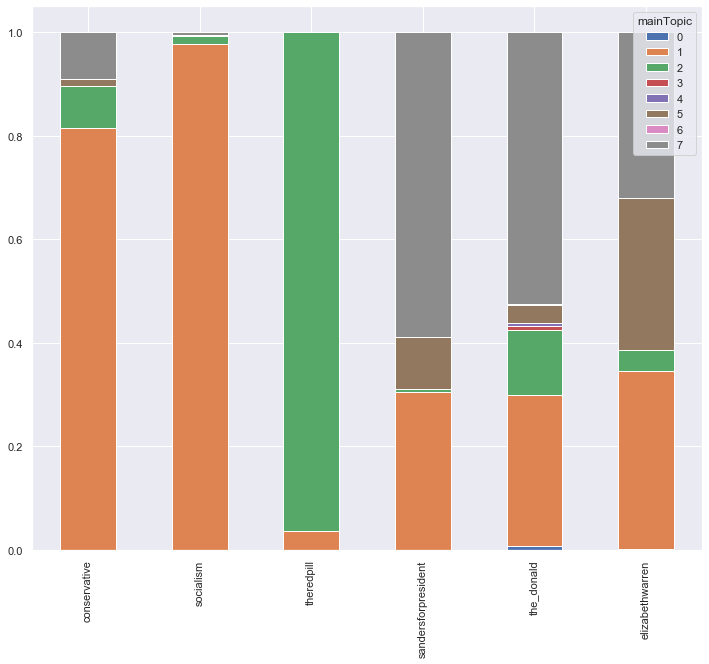

In [807]:
ctp = ct.apply(lambda x: x/x.sum(), axis = 1)
ctp.loc[db['subreddit'].value_counts().index].plot.bar(stacked = True)

## TD

In [324]:
df1 = df.loc[df['subreddit'] ==  'The_Donald']

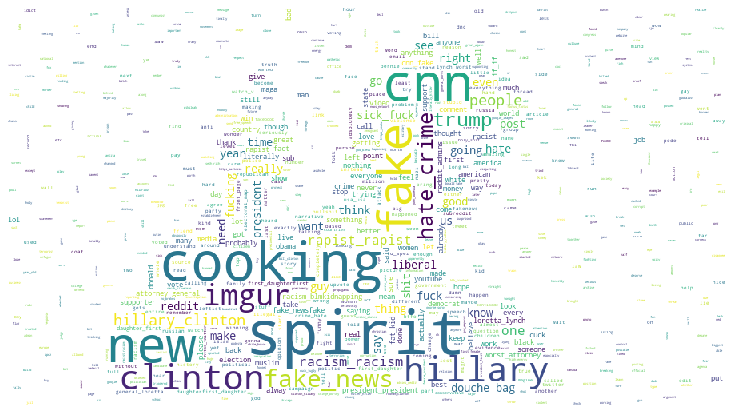

In [248]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
import numpy as np
import matplotlib.pyplot as plt

words = ' '.join(df1['processed'])
mask = np.array(Image.open(requests.get('https://banner2.cleanpng.com/20171217/aaa/donald-trump-png-5a36a55a95a255.6774886015135307146129.jpg', stream=True).raw))
# mask = np.array(Image.open("/Users/gabgilling/Downloads/djt.png"))

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(background_color='white', max_words = 1000, collocations=False, mask=mask).generate(words)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(words, mask)

In [217]:
df1.head()

,subreddit,parent_id,id,score,body,replies,raw,processed,processedLower,preprocessed
0,The_Donald,5bzjv5,d9shs6d,3464,And Podesta ended her campaign with a lie to t...,"[(1401, she couldn't even give a final graciou...",And Podesta ended her campaign with a lie to t...,podesta ended campaign lie crowd fitting even ...,podesta ended campaign lie crowd fitting even ...,podesta ended campaign lie crowd fitting even ...
1,The_Donald,5bzjv5,d9shrml,2630,"Tonight we CELEBRATE, tomorrow's we FUCKING MAGA","[(344, I love you ), (473, ###LOCK HER UP!!!)]","Tonight we CELEBRATE, tomorrow's we FUCKING MA...",tonight celebrate tomorrow fucking maga love l...,tonight celebrate tomorrow fucking maga love lock,tonight celebrate tomorrow fucking maga love l...
2,The_Donald,5bzjv5,d9shrsr,3145,BUSH OUTDATED 👴OBAMA OVERRATED 😫HILARY ELIMINA...,"[(300, I love you )]",BUSH OUTDATED 👴OBAMA OVERRATED 😫HILARY ELIMINA...,bush outdated obama overrated hilary eliminate...,bush outdated obama overrated hilary eliminate...,bush outdated obama overrated hilary eliminate...
3,The_Donald,5bzjv5,d9shrvj,1716,gg ez,"[(170, Sick references bro. Your references ar...",gg ez Sick references bro. Your references are...,gg ez sick references bro references sick top_...,gg ez sick references bro references sick top ...,gg ez sick references bro references sick top_...
4,The_Donald,5bzjv5,d9si7hr,752,/r/hillaryclinton is basically shut down. fuck...,"[(344, And why wouldn't they? It's over. No mo...",/r/hillaryclinton is basically shut down. fuck...,r_hillaryclinton basically shut_down fucking h...,hillaryclinton basically shut fucking hilariou...,r_hillaryclinton basically shut_down fucking h...


In [218]:
texts1 = df1['processed'].apply(lambda x: x.split())
id2word1 = Dictionary(texts1)
corpus1 = [id2word.doc2bow(text) for text in texts1]
ldamodel1 = LdaModel(corpus=corpus1, id2word=id2word1, num_topics=8)

In [219]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel1, corpus1, dictionary=ldamodel1.id2word)

/Users/gabgilling/anaconda3/envs/QMSS/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.302428  0.031145       1        1  46.806690
3     -0.227402  0.022224       2        1  17.685291
1     -0.223494  0.015102       3        1   8.078707
6      0.230802  0.282168       4        1   7.801091
2      0.135809  0.179767       5        1   6.939015
5      0.026857 -0.152779       6        1   4.726482
7      0.186937 -0.163232       7        1   4.705890
0      0.172921 -0.214396       8        1   3.256830, topic_info=     Category          Freq               Term         Total  loglift  logprob
846   Default  92934.000000               poor  92934.000000  30.0000  30.0000
377   Default  79632.000000             proper  79632.000000  29.0000  29.0000
1222  Default  76358.000000             defied  76358.000000  28.0000  28.0000
179   Default  25238.000000               dear  25238.000000  27.0000  27.0000
157   Default  20990.000000               john  20990.000000  26.0000  26.0000
...       ...           ...                ...           ...      ...      ...
1533   Topic8   1219.137085          prevailed   1324.176392   3.3418  -4.2299
8453   Topic8    640.733337                dic    682.312439   3.3615  -4.8732
1589   Topic8    529.418213              point    546.784668   3.3921  -5.0641
2752   Topic8    865.203247         discussion   1193.868530   3.1024  -4.5729
815    Topic8   2129.238281  concession_speech   5244.456543   2.5230  -3.6723

[430 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
4474       5  0.996757      abode
4474       6  0.002347      abode
4474       7  0.000782      abode
1333       4  0.997250   absolute
1333       7  0.001364   absolute
...      ...       ...        ...
215        6  0.993331        yes
215        7  0.003473        yes
19542      2  0.683915  your_part
19542      4  0.314108  your_part
19542      7  0.000913  your_part

[1143 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 2, 7, 3, 6, 8, 1])

In [346]:
pyLDAvis.gensim.prepare(ldamodel12, corpus12, dictionary=ldamodel12.id2word)

KeyboardInterrupt: 

## Bernie

In [236]:
df2 = df.loc[df['subreddit'] ==  'SandersForPresident']

In [106]:
allWords2 = [item for sublist in df2['processedLower'].apply(lambda x: x.split()).to_list() for item in sublist]

In [107]:
wordCounts = Counter(allWords2)
sorted2 = sorted(dict(wordCounts).items(), key=operator.itemgetter(1), reverse = True)

In [109]:
sorted2

[('bernie', 36723),
 ('people', 25665),
 ('like', 19056),
 ('vote', 13930),
 ('sanders', 13806),
 ('hillary', 12680),
 ('one', 11822),
 ('think', 10954),
 ('trump', 10718),
 ('time', 9487),
 ('even', 9416),
 ('us', 9132),
 ('know', 8827),
 ('clinton', 8714),
 ('going', 8516),
 ('make', 8309),
 ('really', 7975),
 ('right', 7920),
 ('need', 7767),
 ('want', 7661),
 ('good', 7547),
 ('much', 7526),
 ('see', 7449),
 ('go', 7221),
 ('party', 7095),
 ('money', 6975),
 ('way', 6921),
 ('campaign', 6651),
 ('also', 6613),
 ('still', 6471),
 ('could', 6358),
 ('election', 6120),
 ('well', 5973),
 ('win', 5734),
 ('say', 5524),
 ('many', 5491),
 ('reddit', 5351),
 ('voting', 5233),
 ('candidate', 5108),
 ('actually', 5075),
 ('support', 5023),
 ('state', 5021),
 ('got', 4805),
 ('new', 4761),
 ('let', 4750),
 ('work', 4712),
 ('someone', 4695),
 ('every', 4674),
 ('president', 4630),
 ('thing', 4589),
 ('never', 4584),
 ('first', 4543),
 ('lot', 4463),
 ('take', 4455),
 ('said', 4444),
 ('better

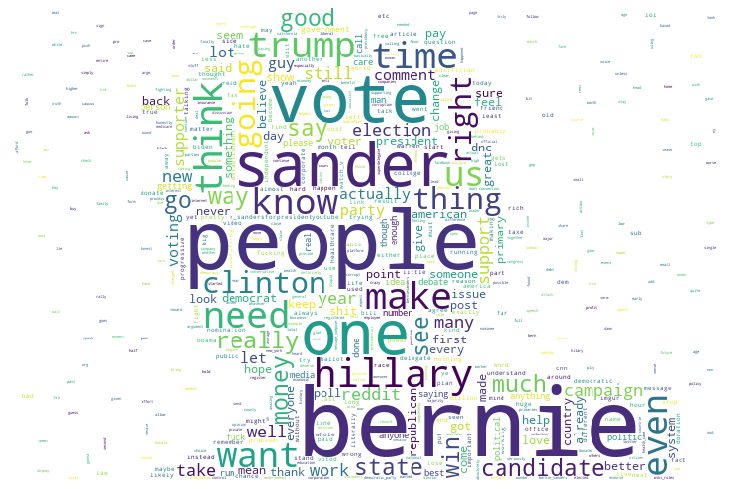

In [246]:
words = ' '.join(df2['processed'])
# mask = np.array(Image.open(requests.get('https://banner2.cleanpng.com/20180410/qow/kisspng-bernie-sanders-our-revolution-united-states-electi-vladimir-putin-5acc661d280fe8.3519436115233449251641.jpg', stream=True).raw))
# mask = np.array(Image.open("/Users/gabgilling/Downloads/djt.png"))

mask = np.array(Image.open(requests.get('https://c7.uihere.com/files/473/599/644/5bbc336e18fdd.jpg', stream=True).raw))

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(background_color='white', max_words=1500, collocations=False, mask=mask).generate(words)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(words, mask)

In [117]:
texts2 = df2['processedLower'].apply(lambda x: x.split())
id2word2 = Dictionary(texts2)
corpus2 = [id2word2.doc2bow(text) for text in texts2]
ldamodel2 = LdaModel(corpus=corpus2, id2word=id2word2, num_topics=8)

In [118]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel2, corpus2, dictionary=ldamodel2.id2word)

/Users/gabgilling/anaconda3/envs/QMSS/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.118834 -0.040100       1        1  29.149324
4      0.076925  0.002245       2        1  18.455841
6      0.083207 -0.006225       3        1  17.562551
5      0.027934 -0.095105       4        1   9.699253
3      0.075131  0.045435       5        1   8.449713
2      0.039537 -0.197160       6        1   8.197289
0      0.026993  0.299944       7        1   4.389609
7     -0.448562 -0.009034       8        1   4.096417, topic_info=     Category          Freq     Term         Total  loglift  logprob
136   Default   5432.000000   reddit   5432.000000  30.0000  30.0000
210   Default  13564.000000  hillary  13564.000000  29.0000  29.0000
289   Default  13891.000000     vote  13891.000000  28.0000  28.0000
0     Default  36798.000000   bernie  36798.000000  27.0000  27.0000
1771  Default   4755.000000   please   4755.000000  26.0000  26.0000
...       ...           ...      ...           ...      ...      ...
3301   Topic8    620.822571   thread    954.765015   2.7646  -5.0648
1986   Topic8   1041.049194      org   2701.101807   2.2416  -4.5478
484    Topic8    990.573303     post   3108.281006   2.0515  -4.5975
7773   Topic8    592.924622     info   1006.156616   2.6662  -5.1108
3100   Topic8    592.003296     type   1056.564941   2.6158  -5.1123

[615 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
7800      1  0.018377  absentee
7800      6  0.977653  absentee
3335      2  0.997812   actblue
9087      2  0.997146  activism
45        1  0.437693  actually
...     ...       ...       ...
44        2  0.073575   youtube
44        4  0.921787   youtube
44        5  0.001196   youtube
44        7  0.001795   youtube
5366      5  0.995015       yup

[1777 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 7, 6, 4, 3, 1, 8])

In [766]:
p = pyLDAvis.gensim.prepare(ldamodel, corpus, id2word)
pyLDAvis.save_html(p, 'lda.html')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/gabgilling/anaconda3/envs/QMSS/lib/python3.7/site-packages/joblib/parallel.py", line 833, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/Users/gabgilling/anaconda3/envs/QMSS/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 521, in wrap_future_result
    return future.result(timeout=timeout)
  File "/Users/gabgilling/anaconda3/envs/QMSS/lib/python3.7/concurrent/futures/_base.py", line 430, in result
    self._condition.wait(timeout)
  File "/Users/gabgilling/anaconda3/envs/QMSS/lib/python3.7/threading.py", line 296, in wait
    waiter.acquire()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/gabgilling/anaconda3/envs/QMSS/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-766-f18ac5c76d5e>", line


KeyboardInterrupt



### 3. Topic modeling through time

#### Assigning topic weights to each thread

In [767]:

ctp.loc[list(db['subreddit'])].plot.bar(stacked = True)

KeyError: "None of [Index(['theredpill', 'theredpill', 'theredpill', 'theredpill', 'theredpill',\n       'theredpill', 'theredpill', 'theredpill', 'theredpill', 'theredpill',\n       ...\n       'sandersforpresident', 'conservative', 'socialism', 'elizabethwarren',\n       'conservative', 'elizabethwarren', 'elizabethwarren', 'elizabethwarren',\n       'sandersforpresident', 'socialism'],\n      dtype='object', name='mainTopic', length=5975)] are in the [index]"

### 4. Similarity scoring

In [375]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

In [366]:
simdb = pd.concat([db1[['subreddit', 'texts']], db2[['subreddit', 'texts']]], ignore_index = True)

In [402]:
simdb = simdb.loc[~simdb['texts'].isnull()]

In [368]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
# simdb['stemmed'] = simdb['texts'].apply(lambda x: [stemmer.stem(t) for t in x])

TypeError: 'float' object is not iterable

In [407]:
labels = simdb['subreddit']

In [425]:
texts = simdb['texts'].apply(lambda x: ' '.join(x))
# tfidf = TfidfVectorizer(max_features=400)
tfidf = TfidfVectorizer(max_features=4000)
textSparse = tfidf.fit_transform(texts)

In [426]:
textDense = textSparse.todense()
textDense.shape

(1985, 4000)

In [427]:
pca = PCA(n_components = 2)

In [428]:
pcaDf = pd.DataFrame(pca.fit_transform(textDense), index= labels, columns = ['C1', 'C2'])

In [418]:
pcaDf.index

Index(['the_donald', 'the_donald', 'the_donald', 'the_donald', 'the_donald',
       'the_donald', 'the_donald', 'the_donald', 'the_donald', 'the_donald',
       ...
       'sandersforpresident', 'sandersforpresident', 'sandersforpresident',
       'sandersforpresident', 'sandersforpresident', 'sandersforpresident',
       'sandersforpresident', 'sandersforpresident', 'sandersforpresident',
       'sandersforpresident'],
      dtype='object', name='subreddit', length=1985)

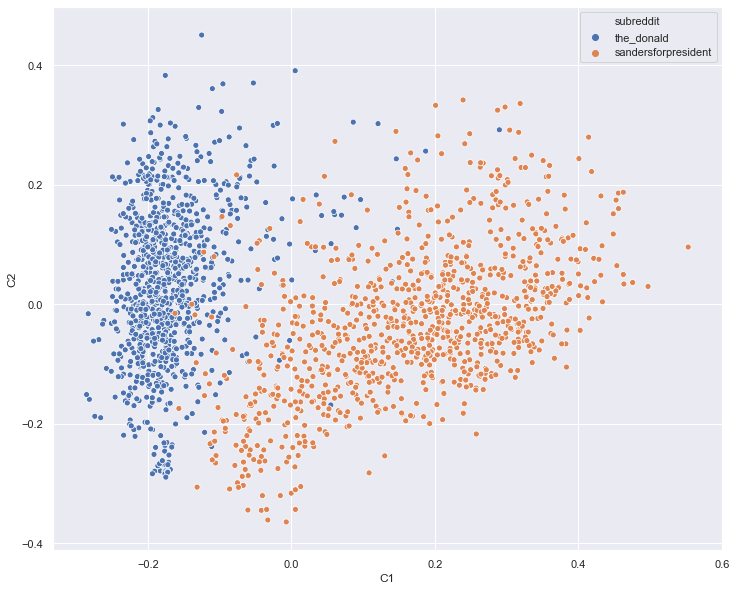

In [429]:
ax = sns.scatterplot(x="C1", y="C2", hue= pcaDf.index, data=pcaDf)

In [730]:
[db[db['subreddit'] == 'sandersforpresident'][['subreddit', 'texts']]]

[               subreddit                                              texts
 26   sandersforpresident  [grade, teacher, confirm, grading, policies, s...
 824  sandersforpresident  [clinton, supporters, earlier, tried, prevent,...
 852  sandersforpresident  [political, equivalent, wrestlemaniaiii, ticke...
 913  sandersforpresident  [worry, obama, pardon, cucked, lot, voters, do...
 578  sandersforpresident  [great, post, examples, think, micro, rejectio...
 ..                   ...                                                ...
 787  sandersforpresident  [continue, vote, bernie, many, people, write, ...
 110  sandersforpresident  [remember, running, mayor, burlington, people,...
 328  sandersforpresident  [gen_x, grew_up, right, us, got, really, screw...
 344  sandersforpresident  [real, tragedy, still, wholeheartedly, believe...
 94   sandersforpresident  [wow, bullet_dodged, great, write, still, pede...
 
 [996 rows x 2 columns]]

In [808]:
simdb = pd.concat([db[db['subreddit'] == 'sandersforpresident'][['subreddit', 'processed']], db[db['subreddit'] == 'elizabethwarren'][['subreddit', 'processed']]], ignore_index = True)
simdb

,subreddit,processed
0,sandersforpresident,"[remember, running, mayor, burlington, people,..."
1,sandersforpresident,"[comparison, candidates, figures, really, matt..."
2,sandersforpresident,"[think, oregon, better, go, polling_stations, ..."
3,sandersforpresident,"[recommend, everyone, watch, whole, section, t..."
4,sandersforpresident,"[hate, disparage, canidate, lesser, evils, imp..."
...,...,...
1971,elizabethwarren,"[pretty, clever, think, basically, creating, y..."
1972,elizabethwarren,"[go, beto, something, interesting, endorse, wa..."
1973,elizabethwarren,"[one, consistently, leaves, room, support, wha..."
1974,elizabethwarren,"[copped, one, todayreally, want, order, one, s..."


In [810]:
simdb = pd.concat([db[db['subreddit'] == 'sandersforpresident'][['subreddit', 'processed']], db[db['subreddit'] == 'elizabethwarren'][['subreddit', 'processed']]], ignore_index = True)
simdb = simdb.loc[~simdb['processed'].isnull()]
labels = simdb['subreddit']
texts = simdb['processed'].apply(lambda x: ' '.join(x))
# tfidf = TfidfVectorizer(max_features=400)
tfidf = TfidfVectorizer(max_features=4000)
textSparse = tfidf.fit_transform(texts)
textDense = textSparse.todense()
pca = PCA(n_components = 2)

In [811]:
pcaDf = pd.DataFrame(pca.fit_transform(textDense), index= labels, columns = ['C1', 'C2'])

In [812]:
pcaDf['C2']

subreddit
sandersforpresident   -0.031283
sandersforpresident   -0.111362
sandersforpresident   -0.119123
sandersforpresident   -0.122459
sandersforpresident   -0.003174
                         ...   
elizabethwarren       -0.076751
elizabethwarren        0.120031
elizabethwarren        0.030069
elizabethwarren       -0.150629
elizabethwarren       -0.024520
Name: C2, Length: 1976, dtype: float64

In [751]:
pcaDf['C1']

subreddit
sandersforpresident    0.402203
sandersforpresident   -0.297338
sandersforpresident   -0.340658
sandersforpresident   -0.127691
sandersforpresident    0.334542
                         ...   
conservative          -0.240117
conservative          -0.090031
conservative           0.367659
conservative           0.068455
conservative          -0.172717
Name: C1, Length: 1993, dtype: float64

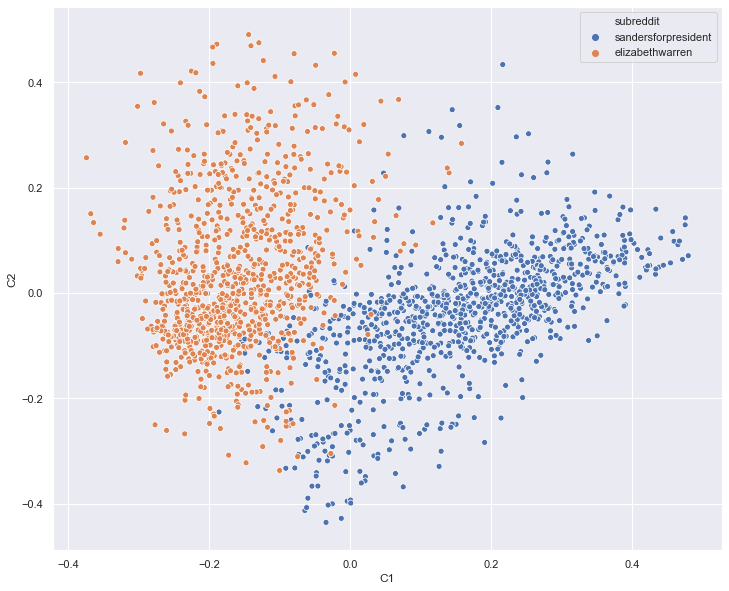

In [813]:
ax = sns.scatterplot(x="C1", y="C2", hue= pcaDf.index, data=pcaDf)

In [814]:
simdb = db[['subreddit', 'processed']]
simdb = simdb.loc[~simdb['processed'].isnull()]
labels = simdb['subreddit']
texts = simdb['processed'].apply(lambda x: ' '.join(x))
# tfidf = TfidfVectorizer(max_features=400)
tfidf = TfidfVectorizer(max_features=4000)
textSparse = tfidf.fit_transform(texts)
textDense = textSparse.todense()
pca = PCA(n_components = 2)

In [815]:
pcaDf = pd.DataFrame(pca.fit_transform(textDense), index= labels, columns = ['C1', 'C2'])

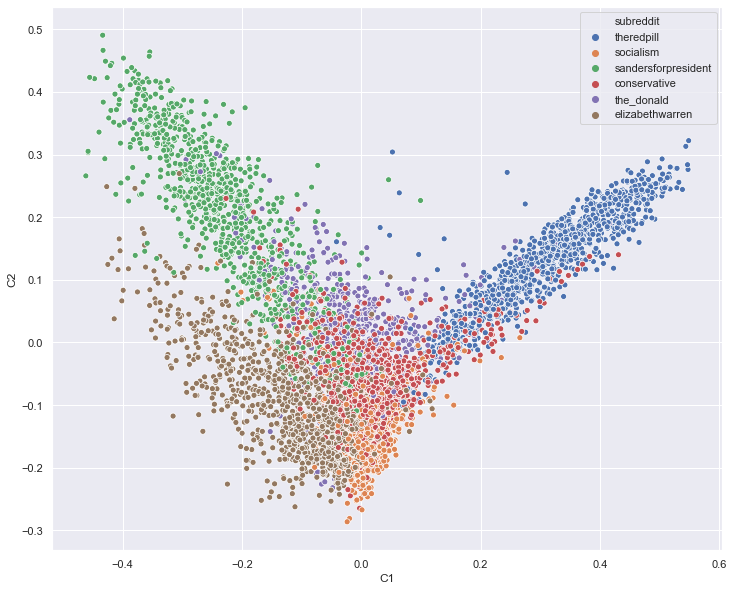

In [816]:
ax = sns.scatterplot(x="C1", y="C2", hue= pcaDf.index, data=pcaDf)

### 4. Sentiment analysis

In [633]:
db.head()

,author,parent_id,title,date,score,post_type,body,subreddit,texts,mainTopic,polarity_tb,subjectivity_tb
693,json_,1rq5gr,6 Harsh Truths That Will Make You a Better Person,2013-11-30 03:29:49,700,text,**EDIT: I did not write this.** A link to the ...,theredpill,"[https_pastebin, slander, female, socialist, f...",0,0.092534,0.535129
831,SoftHarem,1u6m3m,"The basics explained, and our direction for 2014.",2014-01-02 06:05:55,644,text,"Well folks, as 2013 wraps up this has been a h...",theredpill,"[treating, man, supposedly, loves, worse, trea...",0,0.071271,0.536543
276,BobSagetTheFaget,1unyv5,TIL: Cesar Millan's wife (The Dog Whisperer) f...,2014-01-08 07:47:37,954,media,http://en.wikipedia.org/wiki/Cesar_Millan#Pers...,theredpill,"[dressed, larry_david, rolling, around, box, l...",0,0.135571,0.469005
83,Blake55,1vlpri,Beta for 10 years --> awakens --> breaks habit...,2014-01-20 01:28:12,1348,text,This is not my story - but I found it relevant...,theredpill,"[assumes, sucks, doesn_t, enough, eventually, ...",0,0.119494,0.540884
434,theVet,1vuho8,The documentary that made Scandinavians cut al...,2014-01-22 20:42:08,822,text,The Nordic Council of Ministers (a regional in...,theredpill,"[topic, old, speeches, absolutely, fantastic, ...",6,0.152196,0.496002


In [624]:
db['polarity_tb'] = np.nan
db['subjectivity_tb'] = np.nan

In [ ]:
for i in range(len(db)):
    df.polarity_tb.iloc[i] = TextBlob(" ".join(df.iloc[i])).sentiment.polarity
    df.subjectivity_tb.iloc[i] = TextBlob(" ".join(df.to_translate.iloc[i])).sentiment.subjectivity

In [817]:
db['polarity_tb'] = db['processed'].apply(lambda x: TextBlob(" ".join(x)).sentiment.polarity)
db['subjectivity_tb'] = db['processed'].apply(lambda x: TextBlob(" ".join(x)).sentiment.subjectivity)

In [818]:
db.groupby(by = ['subreddit'])['polarity_tb'].mean()

subreddit
conservative           0.043819
elizabethwarren        0.149844
sandersforpresident    0.105213
socialism              0.059831
the_donald             0.051809
theredpill             0.082987
Name: polarity_tb, dtype: float64

In [819]:
db.groupby(by = ['subreddit'])['subjectivity_tb'].mean()

subreddit
conservative           0.495081
elizabethwarren        0.500541
sandersforpresident    0.498401
socialism              0.485618
the_donald             0.519011
theredpill             0.515582
Name: subjectivity_tb, dtype: float64

### Prediction

In [688]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [650]:
predDf = df[(df['subreddit'] == 'The_Donald') | (df['subreddit'] == 'sandersforpresident')]

In [669]:
predDf['labels'] = 0
for i in range(len(predDf)):
    if predDf['subreddit'].iloc[i] == 'The_Donald':
        predDf['labels'].iloc[i] = 1

/Users/gabgilling/anaconda3/envs/QMSS/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/gabgilling/anaconda3/envs/QMSS/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/gabgilling/anaconda3/envs/QMSS/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

In [670]:
predDf

,body,id,parent_id,preprocessed,raw,replies,score,subreddit,bigramed,processed,date_x,date_y,labels
0,And Podesta ended her campaign with a lie to t...,d9shs6d,5bzjv5,podesta ended campaign lie crowd fitting even ...,And Podesta ended her campaign with a lie to t...,"[(1401, she couldn't even give a final graciou...",3464,The_Donald,"[And, Podesta, ended, her, campaign, with, a, ...",podesta ended campaign lie crowd fitting even ...,2016-11-09 15:42:06,2016-11-09 15:42:06,1
1,"Tonight we CELEBRATE, tomorrow's we FUCKING MAGA",d9shrml,5bzjv5,tonight celebrate fucking maga love lock_her,"Tonight we CELEBRATE, tomorrow's we FUCKING MA...","[(344, I love you ), (473, ###LOCK HER UP!!!)]",2630,The_Donald,"[Tonight, we, CELEBRATE, we, FUCKING, MAGA, I,...",tonight celebrate fucking maga love lock_her,2016-11-09 15:42:06,2016-11-09 15:42:06,1
2,BUSH OUTDATED 👴OBAMA OVERRATED 😫HILARY ELIMINA...,d9shrsr,5bzjv5,bush outdated obama overrated hilary eliminate...,BUSH OUTDATED 👴OBAMA OVERRATED 😫HILARY ELIMINA...,"[(300, I love you )]",3145,The_Donald,"[BUSH, OUTDATED, OBAMA, OVERRATED, HILARY, ELI...",bush outdated obama overrated hilary eliminate...,2016-11-09 15:42:06,2016-11-09 15:42:06,1
3,gg ez,d9shrvj,5bzjv5,gg ez sick references bro references sick top_...,gg ez Sick references bro. Your references are...,"[(170, Sick references bro. Your references ar...",1716,The_Donald,"[gg, ez, Sick, references, bro, Your, referenc...",gg ez sick references bro references sick top_...,2016-11-09 15:42:06,2016-11-09 15:42:06,1
4,/r/hillaryclinton is basically shut down. fuck...,d9si7hr,5bzjv5,r_hillaryclinton basically shut_down fucking h...,/r/hillaryclinton is basically shut down. fuck...,"[(344, And why wouldn't they? It's over. No mo...",752,The_Donald,"[r_hillaryclinton, is, basically, shut_down, f...",r_hillaryclinton basically shut_down fucking h...,2016-11-09 15:42:06,2016-11-09 15:42:06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227041,I'm disappointed and shocked! Bernie is the ON...,dcg0jrr,5nya35,disappointed shocked bernie one trust point,I'm disappointed and shocked! Bernie is the ON...,[],1,SandersForPresident,"[disappointed, and, shocked, Bernie, is, the, ...",disappointed shocked bernie one trust point,2017-01-15 00:38:11,2017-01-15 00:38:11,0
227042,I knew it CJ! You blew up girl!,dcg1vow,5nya35,knew cj blew girl,I knew it CJ! You blew up girl!,[],1,SandersForPresident,"[I, knew, it, CJ, You, blew, up, girl]",knew cj blew girl,2017-01-15 00:38:11,2017-01-15 00:38:11,0
227043,Where is that vote? I wanna see how Illinois v...,dcge4rx,5nya35,vote wanna see illinois voted,Where is that vote? I wanna see how Illinois v...,[],1,SandersForPresident,"[Where, is, that, vote, I, wanna, see, how, Il...",vote wanna see illinois voted,2017-01-15 00:38:11,2017-01-15 00:38:11,0
227044,https://www.youtube.com/watch?v=Hsh_7dcN188,dcgfdgq,5nya35,https_www youtube com watch_v,https://www.youtube.com/watch?v=Hsh_7dcN188,[],1,SandersForPresident,"[https_www, youtube, com, watch_v]",youtube watch_v,2017-01-15 00:38:11,2017-01-15 00:38:11,0


In [676]:
features = tfidf.fit_transform(predDf['processed'])
labels = predDf['subreddit']
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state = 0, train_size = 0.4)
lSVC = LinearSVC()

In [677]:
lSVC.fit(X_train, y_train)

ValueError: Unknown label type: 'unknown'

In [674]:
y_pred = lSVC.predict(X_test)
score = accuracy_score(y_pred, y_test)
score

0.8143259829110021

In [665]:
clf = SGDClassifier().fit(X_train, y_train)

TypeError: '<' not supported between instances of 'Subreddit' and 'Subreddit'

In [683]:
features = tfidf.fit_transform(df['processed'])
labels = df['labels']
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state = 0, train_size = 0.4)
lSVC = LinearSVC()

In [685]:
lSVC.fit(X_train, y_train)
y_pred = lSVC.predict(X_test)
score = accuracy_score(y_pred, y_test)
score

0.6381708014176289

In [694]:
def grid_search_func(param_grid, the_mode_in, the_vec_in, the_lab_in):
    print(param_grid)
    grid_search = GridSearchCV(the_mode_in, param_grid=param_grid, cv=5)
    best_model = grid_search.fit(the_vec_in, the_lab_in)
    max_score = grid_search.best_score_
    best_params = grid_search.best_params_

    return best_model, max_score, best_params

# param_grid = {"max_depth": [10, 50, 100],
#               "n_estimators": [1, 4, 16, 32, 64]}
             #'criterion: ['gini', 'entropy']}
param_grid = {"max_depth": [2, 4, 6],
              "n_estimators": [1, 4, 16, 32, 64]}
clf_pca = RandomForestClassifier()

In [695]:
gridsearch_model, best, opt_params = grid_search_func(
        param_grid, clf_pca, features, labels)

{'max_depth': [2, 4, 6], 'n_estimators': [1, 4, 16, 32, 64]}


In [696]:
opt_params

{'max_depth': 6, 'n_estimators': 32}

In [697]:
clf_pca.set_params(**gridsearch_model.best_params_)
clf_pca.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=32,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [699]:
y_pred = clf_pca.predict(X_test)
score = accuracy_score(y_pred, y_test)
score

0.4228238253115354